In [ ]:
# @title Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# @title Load data
url = "/content/drive/MyDrive/IBM Data Analyst/Project 3: Phân tích đơn hàng huỷ/cancelled_orders.csv"
order = pd.read_csv(url)
order.head()

,order_id,customer_id,order_value,order_time,cancelled_flag,reason
0,ORD_00001,CUST_0099,339.62,2024-01-12,0,NaN
1,ORD_00002,CUST_0231,330.83,2024-03-15,1,Wrong item
2,ORD_00003,CUST_0018,59.86,2024-05-15,0,NaN
3,ORD_00004,CUST_0084,422.77,2024-02-11,0,NaN
4,ORD_00005,CUST_0107,310.94,2024-06-12,0,NaN


In [ ]:
# @title Exploratory Data Analysis
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1000 non-null   object 
 1   customer_id     1000 non-null   object 
 2   order_value     1000 non-null   float64
 3   order_time      1000 non-null   object 
 4   cancelled_flag  1000 non-null   int64  
 5   reason          148 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [ ]:
order["reason"].value_counts()

,count
reason,
Late delivery,37
Customer cancelled,31
Out of stock,30
Payment issue,29
Wrong item,21


In [ ]:
#Tách năm, tháng, ngày
order["date"] = pd.to_datetime(order["order_time"])
order["year"] = order["date"].dt.year
order["month"] = order["date"].dt.month
order["day"] = order["date"].dt.day

Text(0.5, 1.0, ' % total order value by cancelled flag')

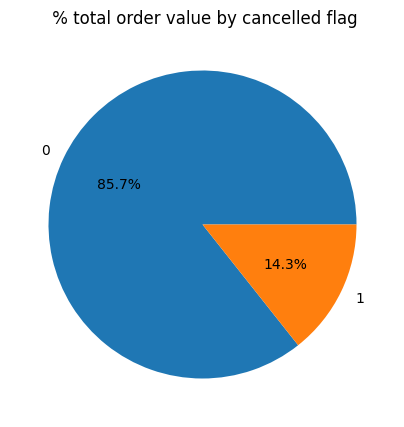

In [ ]:
# @title pie plot order_value by cancelled flag
order_value_grouped = order.groupby("cancelled_flag")["order_value"].sum().reset_index()
plt.figure(figsize =(5,5))
plt.pie(order_value_grouped["order_value"], labels=order_value_grouped["cancelled_flag"], autopct='%1.1f%%')
plt.title(" % total order value by cancelled flag")

Text(0.5, 1.0, 'Total AVG order value by cancelled flag')

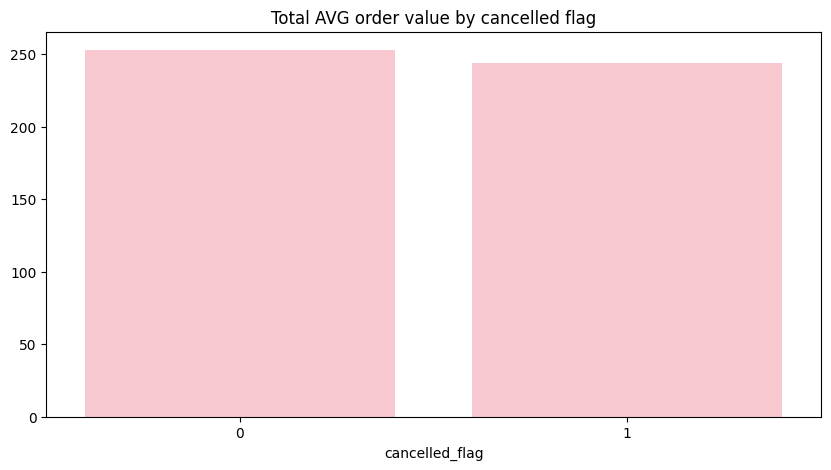

In [ ]:
# @title avg order_value by cancelled flag
order_value_avg = order.groupby("cancelled_flag")["order_value"].mean().sort_values(ascending=False)
plt.figure(figsize =(10,5))
sns.barplot(x=order_value_avg.index, y=order_value_avg.values, color = "pink")
plt.title("Total AVG order value by cancelled flag")

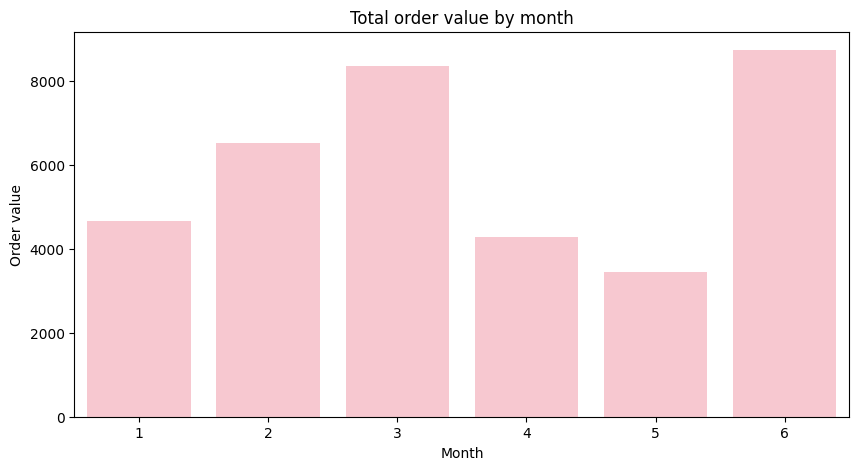

In [ ]:
# @title order value cancelled by month
value_month = order[order["cancelled_flag"] ==1].groupby("month")["order_value"].sum().reset_index()
value_month.columns = ["month","order_value"]
plt.figure(figsize =(10,5))
sns.barplot(x=value_month["month"], y=value_month["order_value"], color = "pink")
plt.title("Total order value by month")
plt.xlabel("Month")
plt.ylabel("Order value")
plt.show()

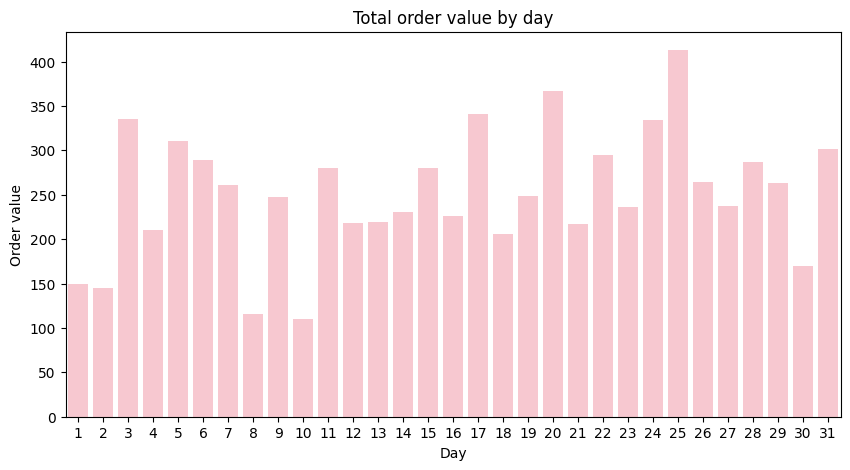

In [ ]:
# @title avg order value cancelled by day
value_day = order[order["cancelled_flag"] ==1].groupby("day")["order_value"].mean().reset_index()
value_month.columns = ["day","order_value"]
plt.figure(figsize =(10,5))
sns.barplot(x=value_day["day"], y=value_day["order_value"], color = "pink")
plt.title("Total order value by day")
plt.xlabel("Day")
plt.ylabel("Order value")
plt.show()

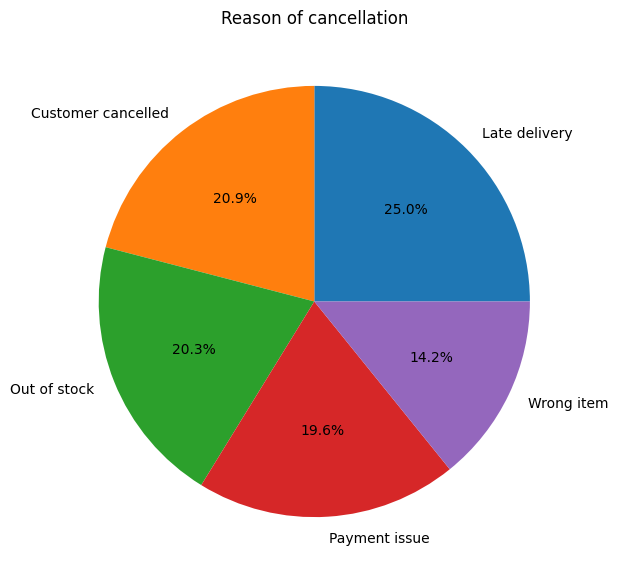

In [ ]:
# @title pieplot reason
reason = order["reason"].value_counts().reset_index()
reason.columns = ["reason","count"]
plt.figure(figsize=(7,7))
plt.pie(reason["count"], labels=reason["reason"], autopct='%1.1f%%')
plt.title("Reason of cancellation")
plt.show()

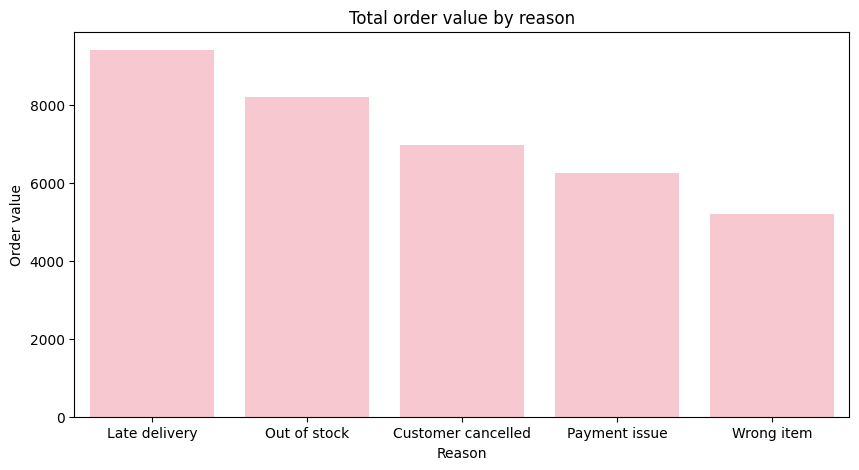

In [ ]:
# tổng giá trị đơn theo lý do huỷ
order_value_cancelled = order.groupby("reason")["order_value"].sum().sort_values(ascending=False)
plt.figure(figsize =(10,5))
sns.barplot(x=order_value_cancelled.index, y=order_value_cancelled.values, color = "pink")
plt.title("Total order value by reason")
plt.xlabel("Reason")
plt.ylabel("Order value")
plt.show()

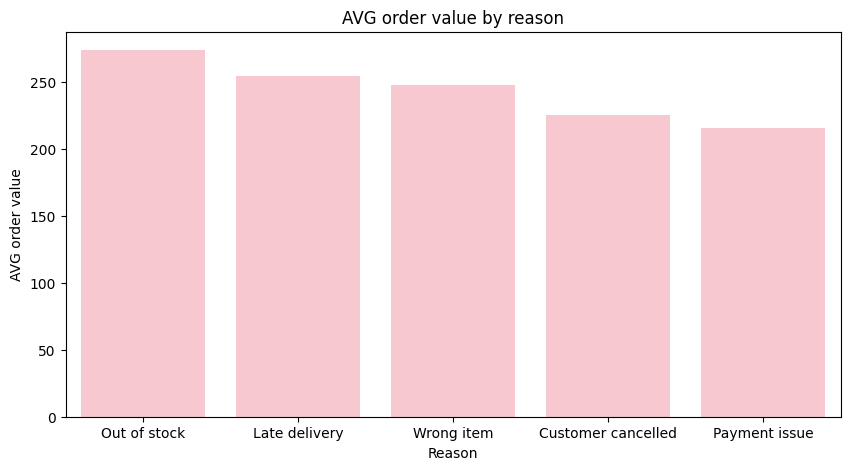

In [ ]:
# AVG giá trị đơn theo lý do huỷ
avg_value_cancelled = order.groupby("reason")["order_value"].mean().sort_values(ascending=False)
plt.figure(figsize =(10,5))
sns.barplot(x=avg_value_cancelled.index, y=avg_value_cancelled.values, color = "pink")
plt.title("AVG order value by reason")
plt.xlabel("Reason")
plt.ylabel("AVG order value")
plt.show()

In [ ]:
# top10 khách hàng thường huỷ đơn nhiều nhất
order[order["cancelled_flag"] == 1]["customer_id"].value_counts().sort_values(ascending=False).head(10)

,count
customer_id,
CUST_0241,3
CUST_0257,3
CUST_0067,3
CUST_0252,2
CUST_0239,2
CUST_0198,2
CUST_0220,2
CUST_0040,2
CUST_0052,2


In [ ]:
cust0241 = order[order["customer_id"]== "CUST_0241"]
cust0241.head()

,order_id,customer_id,order_value,order_time,cancelled_flag,reason,date,year,month,day
189,ORD_00190,CUST_0241,374.86,2024-04-05,1,Out of stock,2024-04-05,2024,4,5
539,ORD_00540,CUST_0241,33.49,2024-05-19,0,NaN,2024-05-19,2024,5,19
557,ORD_00558,CUST_0241,75.41,2024-04-15,0,NaN,2024-04-15,2024,4,15
941,ORD_00942,CUST_0241,373.67,2024-02-29,1,Payment issue,2024-02-29,2024,2,29
981,ORD_00982,CUST_0241,390.37,2024-06-17,1,Wrong item,2024-06-17,2024,6,17


In [ ]:
cust0257 = order[order["customer_id"]== "CUST_0257"]
cust0257.head()

,order_id,customer_id,order_value,order_time,cancelled_flag,reason,date,year,month,day
87,ORD_00088,CUST_0257,445.88,2024-02-01,0,NaN,2024-02-01,2024,2,1
298,ORD_00299,CUST_0257,359.75,2024-02-21,1,Late delivery,2024-02-21,2024,2,21
421,ORD_00422,CUST_0257,420.10,2024-03-16,1,Late delivery,2024-03-16,2024,3,16
499,ORD_00500,CUST_0257,41.40,2024-05-04,0,NaN,2024-05-04,2024,5,4
633,ORD_00634,CUST_0257,469.66,2024-02-03,1,Late delivery,2024-02-03,2024,2,3


In [ ]:
cust0067 = order[order["customer_id"]== "CUST_0067"]
cust0067.head()

,order_id,customer_id,order_value,order_time,cancelled_flag,reason,date,year,month,day
440,ORD_00441,CUST_0067,352.91,2024-06-29,1,Wrong item,2024-06-29,2024,6,29
670,ORD_00671,CUST_0067,82.04,2024-05-20,0,NaN,2024-05-20,2024,5,20
942,ORD_00943,CUST_0067,389.34,2024-01-25,1,Payment issue,2024-01-25,2024,1,25
996,ORD_00997,CUST_0067,289.86,2024-06-08,1,Payment issue,2024-06-08,2024,6,8


In [ ]:
# @title Nhận xét
# - Hầu hết tỷ trọng các lý do huỷ đơn chênh lệch không nhiều. Trong đó Wrong item thấp nhất chiếm 14,2%, các lý do còn lại trong khoảng 19% - 25%
# -> Kiểm tra chất lượng hàng trước khi giao/ nâng chất lượng đóng hàng để đảm bảo hàng không xảy ra tình trạng hư hỏng do yếu tố khách quan bên ngoài.
# - Lý do Late dilivery chiếm tỷ trọng cao nhất (25%), tổng giá trị đơn cũng cao nhất và giá trị trung bình đơn khoảng 250
#-> Giải pháp cải thiện rút ngắn thời gian giao hàng hoặc có pop-up thông báo dịch vụ giao hàng trong vòng bao lâu để xác định lý do khách hàng đưa ra có trung thực hay không.
# - Lý do Out of stock chiếm 20,3% -> Có thể có tình trạng pre order nhưng khi giao không có đủ số lượng hàng theo pre order hoặc nhập tồn kho không đúng -> Xem nguyên nhân thật sự để chọn giải pháp đúng.
# - Lý do Payment issue -> Nâng cấp luồng thanh toán.
# - Đối với lý do từ khách hàng -> Làm khảo sát sâu hơn qua call, bảng câu hỏi... để biết lý do thực sự.